In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
from scipy import stats
from pandas.plotting import autocorrelation_plot
from scipy import signal
from sklearn import linear_model
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_pickle('./data/MaunaLoa_Detrend.pickle')

In [4]:
df.head()

,Original,Performance,Interpolated,WeekIndex,LinearFit,LinearDetrend,SGSeasonalTrend,SGLongTermTrend,SGSeasonalDetrend,SGLongTermDetrend
Timestamp,,,,,,,,,,
1974-05-19,333.34,6,333.34,0,326.242628,7.097372,333.798807,329.590409,-0.458807,3.749591
1974-05-26,332.95,6,332.95,1,326.276478,6.673522,333.308328,329.614732,-0.358328,3.335268
1974-06-02,332.32,5,332.32,2,326.310328,6.009672,332.835895,329.639076,-0.515895,2.680924
1974-06-09,332.18,7,332.18,3,326.344178,5.835822,332.381506,329.663442,-0.201506,2.516558
1974-06-16,332.37,7,332.37,4,326.378028,5.991972,331.945162,329.687830,0.424838,2.682170


In [5]:
ktrends = [c for c in df.columns if c.endswith('Trend') or c.endswith('Fit')]
kdetrends = [c for c in df.columns if c.endswith('Detrend')]

In [6]:
P = np.arange(7)
D = np.arange(3)
Q = np.arange(3)

In [7]:
res = pd.DataFrame(columns=['p', 'd', 'q', 'AIC', 'BIC'])
res

,p,d,q,AIC,BIC


In [8]:
for p in P:
    for d in D:
        for q in Q:
            order = (p,d,q)
            print(order)
            model = ARIMA(df['Interpolated'], order)
            try:
                fit = model.fit()
                x = pd.DataFrame([[p, d, q, fit.aic, fit.bic]], columns=['p', 'd', 'q', 'AIC', 'BIC'])
                res = res.append(x, ignore_index=True)
            except Exception as err:
                print('Fail: %s' % err)

(0, 0, 0)
(0, 0, 1)


/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

(0, 0, 2)
Fail: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
Fail: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(4, 0, 0)
(4, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 0, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 2, 0)
(4, 2, 1)
(4, 2, 2)
Fail: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
(5, 0, 0)
(5, 0, 1)
(5, 0, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 1, 0)
(5, 1, 1)
(5, 1, 2)
(5, 2, 0)
(5, 2, 1)
(5, 2, 2)
Fail: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
(6, 0, 0)
(6, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(6, 0, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(6, 1, 0)
(6, 1, 1)
(6, 1, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(6, 2, 0)
(6, 2, 1)
(6, 2, 2)
Fail: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.


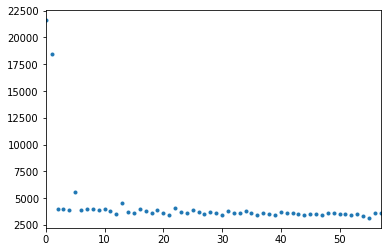

In [20]:
res.sort_values('AIC')['AIC'].plot(linestyle='None', marker='.')

In [10]:
res.sort_values('AIC')

,p,d,q,AIC,BIC
55,6,1,2,3146.518053,3204.194926
54,6,1,1,3362.557719,3414.466904
47,5,1,2,3387.854287,3439.763473
39,4,1,2,3394.593217,3440.734716
52,6,0,2,3407.372681,3465.053784
44,5,0,2,3412.833396,3464.746390
30,3,1,2,3413.633390,3454.007201
36,4,0,2,3430.203837,3476.348720
21,2,1,2,3457.432670,3492.038793
27,3,0,2,3469.572166,3509.948939


In [21]:
model = ARIMA(df['Interpolated'], order=(6, 1, 2))
fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [12]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Interpolated   No. Observations:                 2363
Model:                ARIMA(12, 1, 0)   Log Likelihood               -1701.540
Method:                       css-mle   S.D. of innovations              0.497
Date:                Sun, 29 Dec 2019   AIC                           3431.079
Time:                        11:43:35   BIC                           3511.827
Sample:                    05-26-1974   HQIC                          3460.478
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0324      0.017      1.877      0.061      -0.001       0.066
ar.L1.D.Interpolated     -0.1726      0.020     -8.440      0.000      -0.213      -0.133
ar.L2.D.Interpolated      0.0671      0.021      3.265      0.001       0.027       0.107
ar.L3.D.Interpolated      0.1934      0.021      9.411      0.000       0.153       0.234
ar.L4.D.Interpolated      0.2899      0.021     13.915      0.000       0.249       0.331
ar.L5.D.Interpolated      0.2259      0.022     10.418      0.000       0.183       0.268
ar.L6.D.Interpolated      0.1458      0.022      6.602      0.000       0.103       0.189
ar.L7.D.Interpolated      0.0952      0.022      4.308      0.000       0.052       0.139
ar.L8.D.Interpolated     -0.0157      0.022     -0.723      0.470      -0.058       0.027
ar.L9.D.Interpolated     -0.1004      0.021     -4.813      0.000      -0.141      -0.060
ar.L10.D.Interpolated    -0.0762      0.021     -3.701      0.000      -0.117      -0.036
ar.L11.D.Interpolated    -0.1339      0.021     -6.499      0.000      -0.174      -0.094
ar.L12.D.Interpolated    -0.1103      0.020     -5.383      0.000      -0.150      -0.070
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0634           -0.1775j            1.0781           -0.0263
AR.2             1.0634           +0.1775j            1.0781            0.0263
AR.3             0.7265           -0.9604j            1.2043           -0.1469
AR.4             0.7265           +0.9604j            1.2043            0.1469
AR.5             0.2045           -1.1988j            1.2161           -0.2231
AR.6             0.2045           +1.1988j            1.2161            0.2231
AR.7            -0.3683           -1.1263j            1.1850           -0.3003
AR.8            -0.3683           +1.1263j            1.1850            0.3003
AR.9            -0.9535           -0.7788j            1.2312           -0.3910
AR.10           -0.9535           +0.7788j            1.2312            0.3910
AR.11           -1.2798           -0.2660j            1.3071           -0.4674
AR.12           -1.2798           +0.2660j            1.3071            0.4674
------------------------------------------------------------------------------
"""

In [13]:
residuals = pd.DataFrame(fit.resid, columns=['residuals'])
residuals.head()

,residuals
Timestamp,
1974-05-26,-0.422444
1974-06-02,-0.660024
1974-06-09,-0.088977
1974-06-16,0.371161
1974-06-23,-0.514333


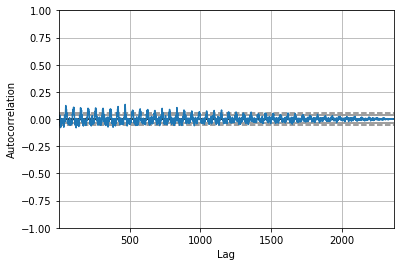

In [14]:
autocorrelation_plot(residuals)

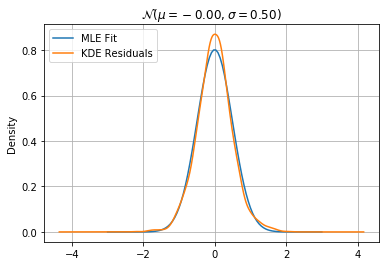

In [15]:
t = np.linspace(-3, 3, 100)
p = stats.norm.fit(residuals)
fig, axe = plt.subplots()
axe.plot(t, stats.norm(*p).pdf(t))
residuals.plot(kind='kde', ax=axe)
axe.set_title(r'$\mathcal{N}(\mu=%.2f,\sigma=%.2f)$' % p)
axe.legend(['MLE Fit', 'KDE Residuals'], loc='upper left')
axe.grid()

In [16]:
preds = fit.predict(2, len(df['Interpolated'])+52*12, typ='levels')

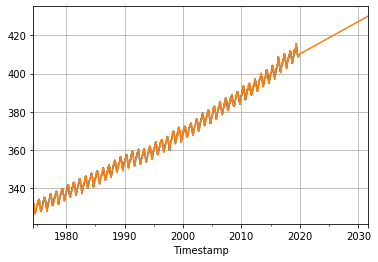

In [17]:
ax = df['Interpolated'].plot()
preds.plot(ax=ax)
ax.grid()